In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import allensdk as a
import numpy as np
import seaborn as sns

/Users/marta/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%matplotlib inline

In [101]:
from allensdk.core.cell_types_cache import CellTypesCache

# Instantiate the CellTypesCache instance.  The manifest_file argument
# tells it where to store the manifest, which is a JSON file that tracks
# file paths.  If you supply a relative path (like this), it will go
# into your current working directory
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')


In [102]:
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi

cells = ctc.get_cells(species=[CellTypesApi.MOUSE])
print("Mouse cells: %d" % len(cells))

# download all electrophysiology features for all cells
ephys_features = ctc.get_ephys_features()
ef_df = pd.DataFrame(ephys_features)


print("Ephys. features available for %d cells" % len(ef_df))




Mouse cells: 1058
Ephys. features available for 1337 cells


In [153]:
cells_df=pd.DataFrame(cells)

In [154]:
cells_df.head()


,apical,cell_prep_sample_id,cell_reporter,cell_reporter_id,cell_soma_locations,cortex_layer,cortex_layer_id,data,data_sets,dendrite_type,...,species,specimen_id_path,specimen_tags,sphinx_id,structure,structure_id,tissue_ph,transgenic_line,treatment_id,weight
0,intact,None,"{u'id': 491913822, u'name': u'cre reporter pos...",491913822,"[{u'normalized_depth': 0.285936747471, u'speci...",NaN,NaN,None,[],spiny,...,Mus musculus,/504923436/505798538/505804043/505808144/,"[{u'id': 470927414, u'ar_association_key_name'...",264856,"{u'st_level': None, u'graph_id': 1, u'name': u...",721,None,Nr5a1-Cre,598634036,9000
1,intact,None,"{u'id': 491913820, u'name': u'not applicable'}",491913820,"[{u'normalized_depth': 0.158926623289, u'speci...","{u'st_level': None, u'graph_id': 573995413, u'...",574006859,None,"[{u'name': u'H301-Ax.160817_04_A03_537218493',...",spiny,...,Homo Sapiens,/536913880/536917508/536932035/537218493/,"[{u'id': 470927414, u'ar_association_key_name'...",279124,"{u'st_level': None, u'graph_id': 16, u'name': ...",12141,None,None,598634036,9000
2,truncated,None,"{u'id': 491913822, u'name': u'cre reporter pos...",491913822,"[{u'normalized_depth': 0.586812059837, u'speci...",NaN,NaN,None,[],spiny,...,Mus musculus,/397332031/457925382/458216921/469763389/,"[{u'id': 470927257, u'ar_association_key_name'...",256762,"{u'st_level': None, u'graph_id': 1, u'name': u...",721,None,Rorb-IRES2-Cre,598634036,9000
3,NA,None,"{u'id': 491913822, u'name': u'cre reporter pos...",491913822,"[{u'normalized_depth': 1.0, u'specimen_id': 56...",NaN,NaN,None,[],aspiny,...,Mus musculus,/565087390/566486723/566488302/566559909/,"[{u'id': 470927759, u'ar_association_key_name'...",289642,"{u'st_level': None, u'graph_id': 1, u'name': u...",33,None,Nkx2-1-CreERT2,598634036,9000
4,intact,None,"{u'id': 491913822, u'name': u'cre reporter pos...",491913822,"[{u'normalized_depth': 0.455007800183, u'speci...",NaN,NaN,None,"[{u'name': u'T301-Ax.150428_01_B05_475459689',...",spiny,...,Mus musculus,/475196480/475458297/475458647/475459689/,"[{u'id': 470927414, u'ar_association_key_name'...",257002,"{u'st_level': None, u'graph_id': 1, u'name': u...",721,None,Nr5a1-Cre,598634036,9000


In [155]:
print cells_df.columns

Index([u'apical', u'cell_prep_sample_id', u'cell_reporter',
       u'cell_reporter_id', u'cell_soma_locations', u'cortex_layer',
       u'cortex_layer_id', u'data', u'data_sets', u'dendrite_type',
       u'disease_categories', u'donor', u'donor_id', u'ephys_features',
       u'ephys_result_id', u'external_specimen_name', u'failed_facet',
       u'has_morphology', u'has_reconstruction', u'hemisphere', u'id',
       u'is_cell_specimen', u'is_ish', u'name', u'neuron_reconstructions',
       u'parent_id', u'parent_x_coord', u'parent_y_coord', u'parent_z_coord',
       u'pinned_radius', u'reporter_status', u'rna_integrity_number',
       u'species', u'specimen_id_path', u'specimen_tags', u'sphinx_id',
       u'structure', u'structure_id', u'tissue_ph', u'transgenic_line',
       u'treatment_id', u'weight'],
      dtype='object')


In [156]:
cells = ctc.get_cells()
# we want to add dendrite type as a column to the ephys. features dataframe
# first build an index on cell specimen ID, then create array of dendrite types
cell_index = { c['id']: c for c in cells }
#print cell_index

dendrite_types = [ cell_index[cid]['dendrite_type'] for cid in ef_df['specimen_id'] ]
lines=[cell_index[cid]['transgenic_line'] for cid in ef_df['specimen_id'] ]
species=[cell_index[cid]['species'] for cid in ef_df['specimen_id'] ]
# now add the new column
ef_df['dendrite_type'] = pd.Series(dendrite_types, index=ef_df.index)
ef_df['transgenic_line']= pd.Series(lines, index=ef_df.index)
ef_df['species']= pd.Series(species, index=ef_df.index)


print len(ef_df)

1337


In [157]:

trans_line_target=ef_df.transgenic_line.map({'Nkx2-1-CreERT2': 'inh', 'Gad2-IRES-Cre': 'inh', 'Sst-IRES-Cre': 'inh',
                                             'Pvalb-IRES-Cre':'inh', 'Htr3a-Cre_NO152': 'inh', 'Vip-IRES-Cre': 'inh',
                                             'Chat-IRES-Cre-neo': 'not specyfic','Ndnf-IRES2-dgCre':'inh', None: 'unknown', 
                                             'Rorb-IRES2-Cre' : 'exc','Cux2-CreERT2':'exc', 'Scnn1a-Tg3-Cre': 'exc',
                                             'Nr5a1-Cre':'exc', 'Rbp4-Cre_KL100':'exc', 'Ctgf-T2A-dgCre':'exc',
                                             'Emx1-IRES-Cre':'exc', 'Slc17a6-IRES-Cre': 'exc', 'Ntsr1-Cre_GN220':'exc',
                                             'Chrna2-Cre_OE25':'not specyfic', 'Scnn1a-Tg2-Cre':'exc'})

      
ef_df['trans_line_target']= pd.Series(trans_line_target, index=ef_df.index)        

In [158]:
ef_df.head()



,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,dendrite_type,transgenic_line,species,trans_line_target
0,0.093021,81.498750,-6.184375,0.205899,1.126905,2.768700,1.025464,-51.187504,-50.328125,-55.312504,...,-69.306253,3.904747,4.131130,3.899439,-85.156258,-68.233376,spiny,Cux2-CreERT2,Mus musculus,exc
1,0.064384,76.283333,26.135000,0.195247,1.102660,4.005247,1.024873,-48.718750,-49.875001,-51.500004,...,-67.416669,4.231335,4.299535,3.939083,-78.593750,-66.085068,spiny,Chrna2-Cre_OE25,Mus musculus,not specyfic
2,NaN,NaN,-4.600001,0.055443,1.104820,9.092507,1.025024,-48.093750,-49.541669,-50.312503,...,-75.656255,2.154281,1.486651,2.400687,-87.156250,-75.141449,spiny,None,Homo Sapiens,unknown
3,0.048709,118.397143,-90.575616,0.307589,1.069770,7.203945,1.024593,-45.968754,-49.093754,-53.800002,...,-66.318753,2.026000,1.827572,1.818158,-82.406250,-65.503044,aspiny,Sst-IRES-Cre,Mus musculus,inh
4,0.042215,81.394545,13.653750,0.162729,1.089750,2.336427,1.027302,-48.906250,-51.083335,-55.800002,...,-73.337500,4.208485,4.274151,4.096372,-99.093758,-72.174675,spiny,Cux2-CreERT2,Mus musculus,exc


In [143]:
print ef_df.columns

Index([u'adaptation', u'avg_isi', u'electrode_0_pa', u'f_i_curve_slope',
       u'fast_trough_t_long_square', u'fast_trough_t_ramp',
       u'fast_trough_t_short_square', u'fast_trough_v_long_square',
       u'fast_trough_v_ramp', u'fast_trough_v_short_square', u'has_burst',
       u'has_delay', u'has_pause', u'id', u'input_resistance_mohm', u'latency',
       u'peak_t_long_square', u'peak_t_ramp', u'peak_t_short_square',
       u'peak_v_long_square', u'peak_v_ramp', u'peak_v_short_square',
       u'rheobase_sweep_id', u'rheobase_sweep_number', u'ri', u'sag',
       u'seal_gohm', u'slow_trough_t_long_square', u'slow_trough_t_ramp',
       u'slow_trough_t_short_square', u'slow_trough_v_long_square',
       u'slow_trough_v_ramp', u'slow_trough_v_short_square', u'specimen_id',
       u'threshold_i_long_square', u'threshold_i_ramp',
       u'threshold_i_short_square', u'threshold_t_long_square',
       u'threshold_t_ramp', u'threshold_t_short_square',
       u'threshold_v_long_square', u't

In [159]:

ef_df.dendrite_type.value_counts()

spiny             793
aspiny            514
sparsely spiny     30
Name: dendrite_type, dtype: int64

In [160]:
ef_df.species.value_counts()

Mus musculus    1058
Homo Sapiens     279
Name: species, dtype: int64

In [161]:
#I exclude cell with no inf about trans line-probably they are human cells
ef_df_mouse=ef_df[ef_df['species'].values == 'Mus musculus']
print len(ef_df_mouse)


1058


In [162]:
ef_df_mouse=ef_df_mouse.fillna(0)

In [163]:
ef_df_mouse.species.value_counts()

Mus musculus    1058
Name: species, dtype: int64

In [164]:
ef_df_mouse.trans_line_target.value_counts()

exc             593
inh             414
not specyfic     51
Name: trans_line_target, dtype: int64

In [165]:
print ef_df_mouse[ef_df_mouse['trans_line_target'] == 'not specyfic']

      adaptation     avg_isi  electrode_0_pa  f_i_curve_slope  \
1       0.064384   76.283333       26.135000         0.195247   
26      0.052803   92.848000      -12.697500         0.184774   
51      0.000000    0.000000       69.924996         0.000000   
91      0.031901   68.114286      -13.465000         0.276786   
103     0.028765   49.631579       13.537500         0.191333   
147     0.133397  101.475000       20.412500         0.133117   
165     0.274982   41.930000      -17.122500         0.019242   
166     0.000000    0.000000       29.309999         0.006729   
215     0.069928  115.305000      -37.857498         0.134641   
253     0.008669   43.976190      -21.325001         0.402333   
254     0.251984   23.650000      -27.169999         0.383915   
276     0.178237  125.366667        7.852500         0.087331   
340     0.000000    0.000000       75.094993         0.026296   
365    -0.004895   77.911667        2.515000         0.228509   
375     0.072073   95.882

In [166]:
ef_df_mouse=ef_df[ef_df['trans_line_target'] != 'not specyfic']


In [167]:
ef_df_mouse.trans_line_target.value_counts()

exc        593
inh        414
unknown    279
Name: trans_line_target, dtype: int64

In [168]:
ef_df_mouse=ef_df_mouse[ef_df_mouse['trans_line_target'] != 'unknown']

In [169]:
ef_df_mouse.trans_line_target.value_counts()

exc    593
inh    414
Name: trans_line_target, dtype: int64

In [170]:
ef_df_mouse.dendrite_type.value_counts()

spiny             559
aspiny            436
sparsely spiny     12
Name: dendrite_type, dtype: int64

In [171]:
ef_df_mouse.trans_line_target.value_counts()

exc    593
inh    414
Name: trans_line_target, dtype: int64

In [172]:
print ef_df_mouse[ef_df_mouse['trans_line_target'] == 'unknown']

Empty DataFrame
Columns: [adaptation, avg_isi, electrode_0_pa, f_i_curve_slope, fast_trough_t_long_square, fast_trough_t_ramp, fast_trough_t_short_square, fast_trough_v_long_square, fast_trough_v_ramp, fast_trough_v_short_square, has_burst, has_delay, has_pause, id, input_resistance_mohm, latency, peak_t_long_square, peak_t_ramp, peak_t_short_square, peak_v_long_square, peak_v_ramp, peak_v_short_square, rheobase_sweep_id, rheobase_sweep_number, ri, sag, seal_gohm, slow_trough_t_long_square, slow_trough_t_ramp, slow_trough_t_short_square, slow_trough_v_long_square, slow_trough_v_ramp, slow_trough_v_short_square, specimen_id, threshold_i_long_square, threshold_i_ramp, threshold_i_short_square, threshold_t_long_square, threshold_t_ramp, threshold_t_short_square, threshold_v_long_square, threshold_v_ramp, threshold_v_short_square, thumbnail_sweep_id, trough_t_long_square, trough_t_ramp, trough_t_short_square, trough_v_long_square, trough_v_ramp, trough_v_short_square, upstroke_downstroke_r

In [173]:
ef_df_mouse.transgenic_line.value_counts() #this numbers are not exactlu the same as the one in online database...

Rorb-IRES2-Cre      160
Pvalb-IRES-Cre      143
Sst-IRES-Cre        112
Htr3a-Cre_NO152      90
Nr5a1-Cre            77
Rbp4-Cre_KL100       76
Cux2-CreERT2         76
Scnn1a-Tg3-Cre       63
Ntsr1-Cre_GN220      59
Scnn1a-Tg2-Cre       48
Ctgf-T2A-dgCre       31
Nkx2-1-CreERT2       23
Vip-IRES-Cre         20
Ndnf-IRES2-dgCre     15
Gad2-IRES-Cre        11
Slc17a6-IRES-Cre      3
Name: transgenic_line, dtype: int64

In [174]:
ef_df_mouse.trans_line_target.value_counts()

exc    593
inh    414
Name: trans_line_target, dtype: int64

In [175]:
#df = df[df.value != 123456.]
ef_df_mouse=ef_df_mouse[ef_df_mouse['input_resistance_mohm']<500]

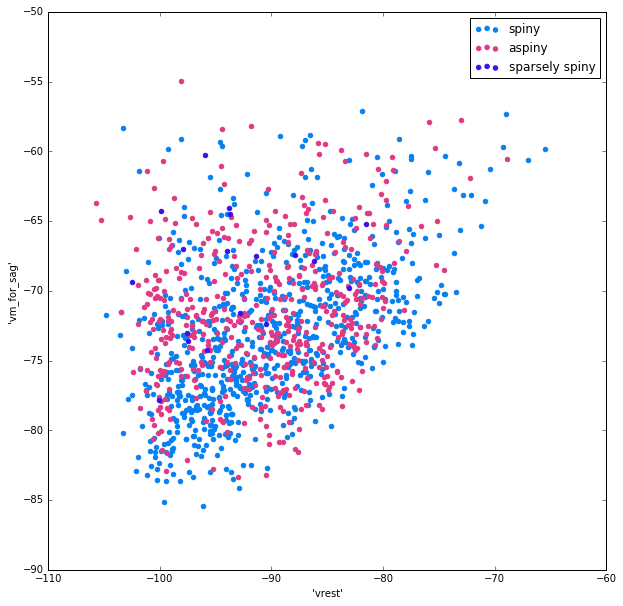

In [56]:

fig = plt.figure(figsize=(10,10))

for d_type, color in [["spiny", "#0781f2"], ["aspiny", "#df3b85"],["sparsely spiny", "#3a12ea"] ]:
    df = ef_df_mouse[ef_df_mouse['dendrite_type'] == d_type]
    plt.scatter(df['vm_for_sag'], 
                df['vrest'], 
                color=color, label=d_type)

    plt.ylabel("'vm_for_sag'")
    plt.xlabel("'vrest'")
    plt.legend(loc='best')
    
plt.show()

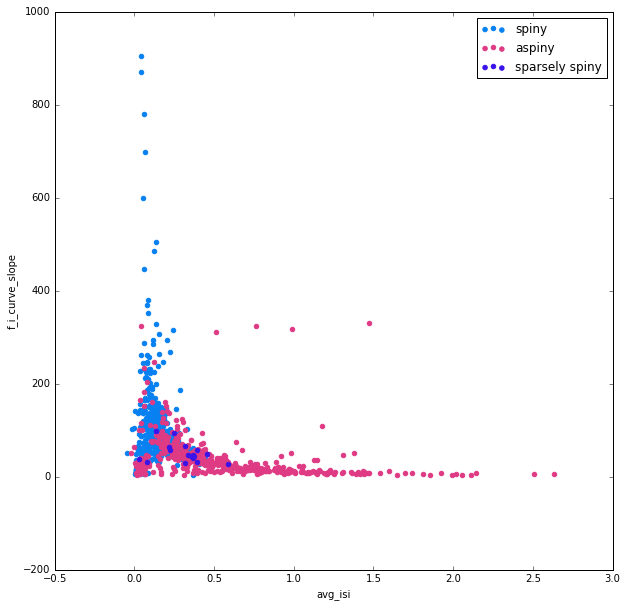

In [57]:

fig = plt.figure(figsize=(10,10))


for d_type, color in [ ["spiny", "#0781f2"], ["aspiny", "#df3b85"],["sparsely spiny", "#3a12ea"] ]:
    df = ef_df_mouse[ef_df_mouse['dendrite_type'] == d_type]
    plt.scatter(df['f_i_curve_slope'], 
                df['avg_isi'], 
                color=color, label=d_type)

    plt.ylabel('f_i_curve_slope')
    plt.xlabel('avg_isi')
    plt.legend(loc='best')
    
plt.show()

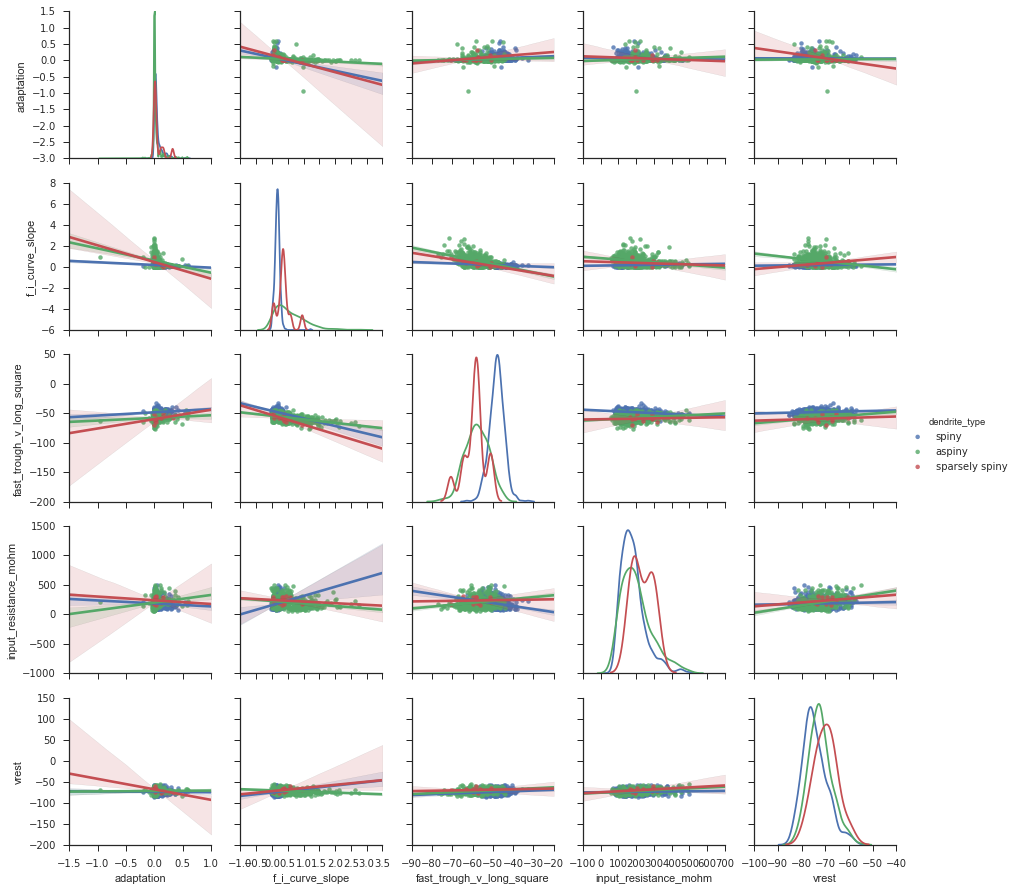

In [250]:
sns.set(style="ticks", color_codes=True)

sns.pairplot(ef_df_mouse, kind='reg', hue='dendrite_type', x_vars=['adaptation', 'f_i_curve_slope','fast_trough_v_long_square',
                                                 'input_resistance_mohm','vrest'], 
                                         y_vars=['adaptation', 'f_i_curve_slope','fast_trough_v_long_square',
                                                 'input_resistance_mohm','vrest'], diag_kind='kde')


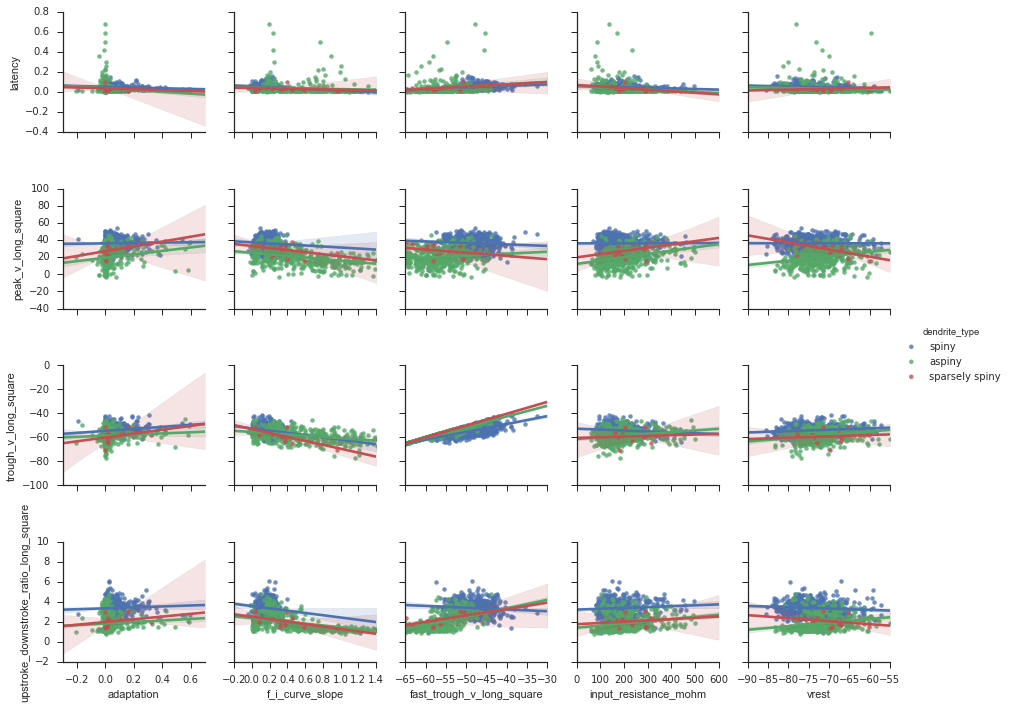

In [251]:
sns.set(style="ticks", color_codes=True)

sns.pairplot(ef_df_mouse, kind='reg', hue='dendrite_type', x_vars=['adaptation', 'f_i_curve_slope','fast_trough_v_long_square',
                                                 'input_resistance_mohm','vrest'], 
                                         y_vars=['latency','peak_v_long_square','trough_v_long_square', 
                                               'upstroke_downstroke_ratio_long_square'], diag_kind='kde')


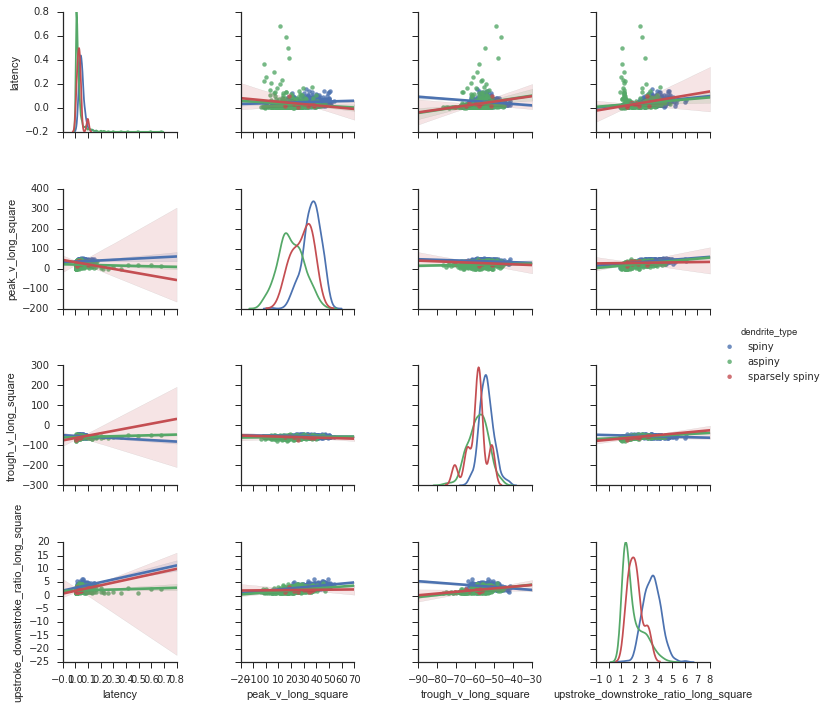

In [252]:
sns.set(style="ticks", color_codes=True)

sns.pairplot(ef_df_mouse,kind='reg', hue='dendrite_type', x_vars=['latency','peak_v_long_square','trough_v_long_square', 
                                               'upstroke_downstroke_ratio_long_square'], 
                                         y_vars=['latency','peak_v_long_square','trough_v_long_square', 
                                               'upstroke_downstroke_ratio_long_square'], diag_kind='kde')



In [176]:
s=ef_df_mouse['has_burst'].where(ef_df_mouse['has_burst']==True)
s=s.dropna()
p=ef_df_mouse['has_pause'].where(ef_df_mouse['has_burst']==True)
p=p.dropna()
k=ef_df_mouse['has_delay'].where(ef_df_mouse['has_burst']==True)
k=k.dropna()
print s,p,k

Series([], Name: has_burst, dtype: float64) Series([], Name: has_pause, dtype: float64) Series([], Name: has_delay, dtype: float64)


In [177]:
ef_df_mouse.head()

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,dendrite_type,transgenic_line,species,trans_line_target
0,0.093021,81.498750,-6.184375,0.205899,1.126905,2.768700,1.025464,-51.187504,-50.328125,-55.312504,...,-69.306253,3.904747,4.131130,3.899439,-85.156258,-68.233376,spiny,Cux2-CreERT2,Mus musculus,exc
3,0.048709,118.397143,-90.575616,0.307589,1.069770,7.203945,1.024593,-45.968754,-49.093754,-53.800002,...,-66.318753,2.026000,1.827572,1.818158,-82.406250,-65.503044,aspiny,Sst-IRES-Cre,Mus musculus,inh
4,0.042215,81.394545,13.653750,0.162729,1.089750,2.336427,1.027302,-48.906250,-51.083335,-55.800002,...,-73.337500,4.208485,4.274151,4.096372,-99.093758,-72.174675,spiny,Cux2-CreERT2,Mus musculus,exc
5,0.044825,91.322222,-46.761876,0.223864,1.190240,3.826338,1.025363,-44.937504,-43.635419,-47.395833,...,-76.791669,2.992793,2.817856,2.706951,-96.906250,-75.320374,spiny,Rorb-IRES2-Cre,Mus musculus,exc
7,0.025413,59.215625,10.571250,0.397263,1.230720,4.531655,1.024268,-54.718750,-54.687503,-59.166670,...,-71.250003,1.473594,1.444992,1.653886,-94.312508,-70.492218,aspiny,Scnn1a-Tg2-Cre,Mus musculus,exc


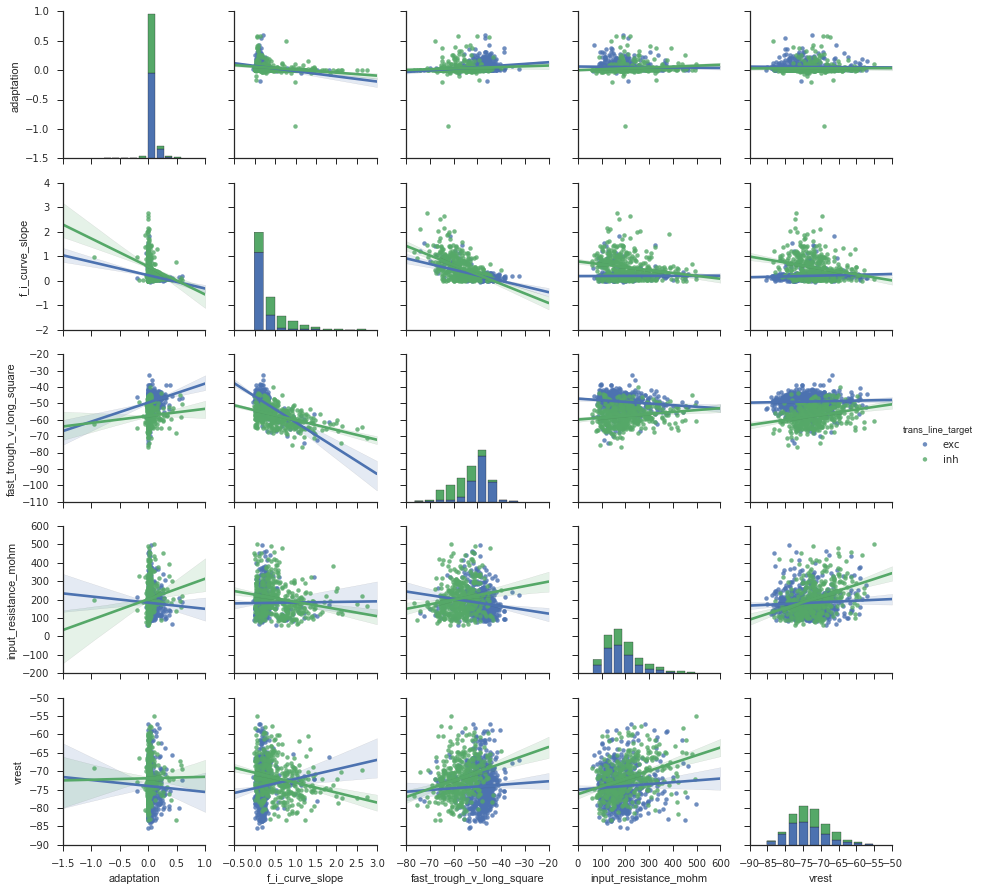

In [253]:
sns.set(style="ticks", color_codes=True)

sns.pairplot(ef_df_mouse, kind='reg', hue='trans_line_target', x_vars=['adaptation', 'f_i_curve_slope','fast_trough_v_long_square',
                                                 'input_resistance_mohm','vrest'], 
                                         y_vars=['adaptation', 'f_i_curve_slope','fast_trough_v_long_square',
                                                 'input_resistance_mohm','vrest'])

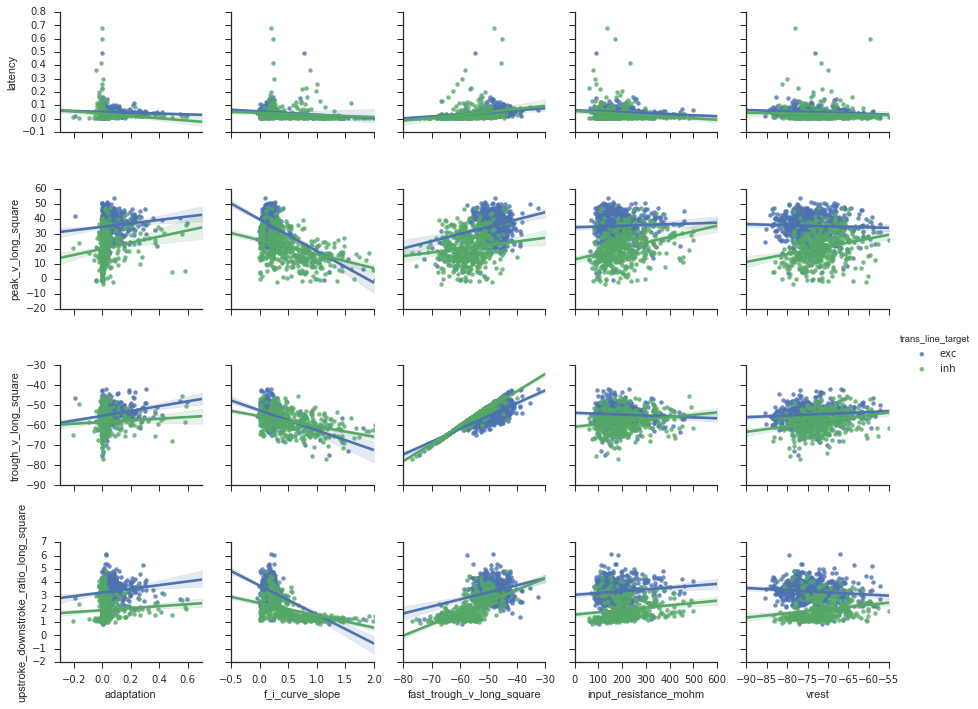

In [254]:
sns.set(style="ticks", color_codes=True)

sns.pairplot(ef_df_mouse, kind='reg', hue='trans_line_target', x_vars=['adaptation', 'f_i_curve_slope','fast_trough_v_long_square',
                                                 'input_resistance_mohm','vrest'], 
                                         y_vars=['latency','peak_v_long_square','trough_v_long_square', 
                                               'upstroke_downstroke_ratio_long_square'])

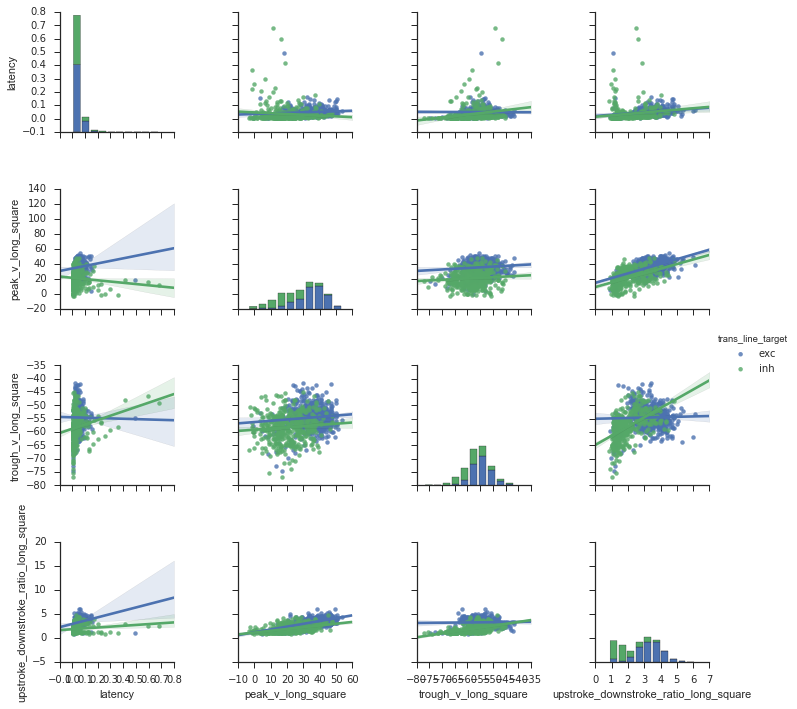

In [255]:
sns.set(style="ticks", color_codes=True)

sns.pairplot(ef_df_mouse,kind='reg', hue='trans_line_target', x_vars=['latency','peak_v_long_square','trough_v_long_square', 
                                               'upstroke_downstroke_ratio_long_square'], 
                                         y_vars=['latency','peak_v_long_square','trough_v_long_square', 
                                               'upstroke_downstroke_ratio_long_square'])



In [178]:
fAHP_amplitude = ef_df_mouse['threshold_v_long_square']-ef_df_mouse['fast_trough_v_long_square']
spike_height = ef_df_mouse['peak_v_long_square']-ef_df_mouse['threshold_v_long_square']

ef_df_mouse['fAHP_amplitude']= pd.Series(fAHP_amplitude, index=ef_df.index)
ef_df_mouse['spike_height']= pd.Series(spike_height, index=ef_df.index)
ef_df_mouse=ef_df_mouse.fillna(0)
ef_df_mouse.head()

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,dendrite_type,transgenic_line,species,trans_line_target,fAHP_amplitude,spike_height
0,0.093021,81.498750,-6.184375,0.205899,1.126905,2.768700,1.025464,-51.187504,-50.328125,-55.312504,...,4.131130,3.899439,-85.156258,-68.233376,spiny,Cux2-CreERT2,Mus musculus,exc,9.718754,83.156254
3,0.048709,118.397143,-90.575616,0.307589,1.069770,7.203945,1.024593,-45.968754,-49.093754,-53.800002,...,1.827572,1.818158,-82.406250,-65.503044,aspiny,Sst-IRES-Cre,Mus musculus,inh,13.875000,45.312504
4,0.042215,81.394545,13.653750,0.162729,1.089750,2.336427,1.027302,-48.906250,-51.083335,-55.800002,...,4.274151,4.096372,-99.093758,-72.174675,spiny,Cux2-CreERT2,Mus musculus,exc,10.749996,71.437504
5,0.044825,91.322222,-46.761876,0.223864,1.190240,3.826338,1.025363,-44.937504,-43.635419,-47.395833,...,2.817856,2.706951,-96.906250,-75.320374,spiny,Rorb-IRES2-Cre,Mus musculus,exc,8.406254,53.468752
7,0.025413,59.215625,10.571250,0.397263,1.230720,4.531655,1.024268,-54.718750,-54.687503,-59.166670,...,1.444992,1.653886,-94.312508,-70.492218,aspiny,Scnn1a-Tg2-Cre,Mus musculus,exc,19.937500,57.500002


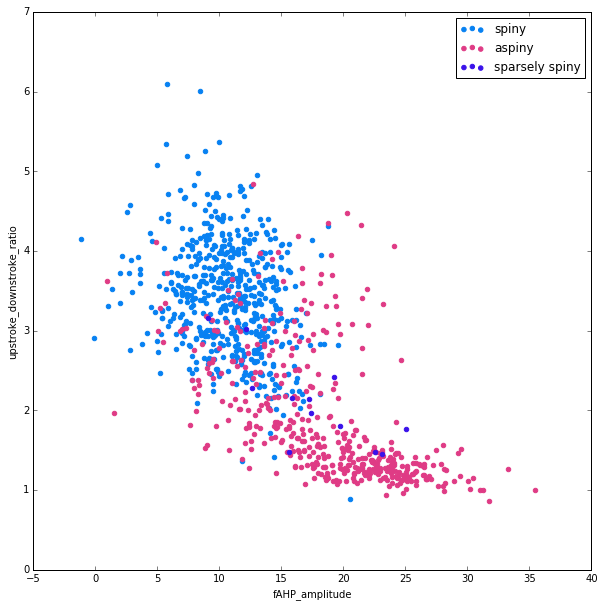

In [179]:

fig = plt.figure(figsize=(10,10))

for d_type, color in [["spiny", "#0781f2"], ["aspiny", "#df3b85"],["sparsely spiny", "#3a12ea"] ]:
    df = ef_df_mouse[ef_df_mouse['dendrite_type'] == d_type]
    plt.scatter(df['fAHP_amplitude'], 
                df['upstroke_downstroke_ratio_long_square'], 
                color=color, label=d_type)

    plt.xlabel("fAHP_amplitude")
    plt.ylabel('upstroke_downstroke_ratio')
    plt.legend(loc='best')
    
plt.show()

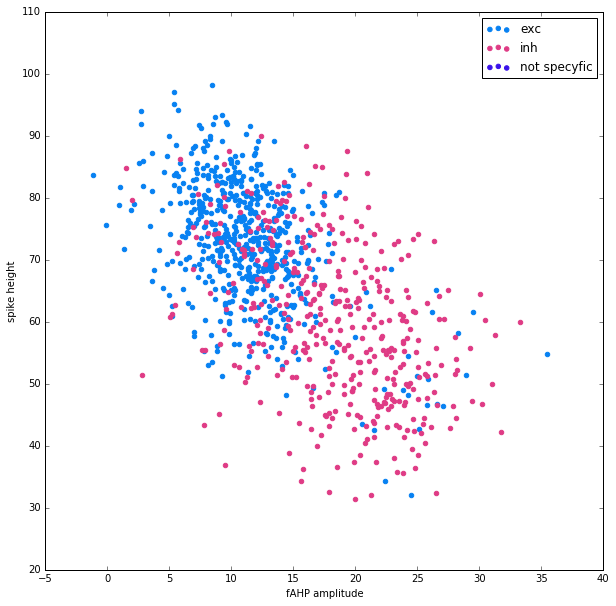

In [180]:

fig = plt.figure(figsize=(10,10))

for d_type, color in [["exc", "#0781f2"], ["inh", "#df3b85"],["not specyfic", "#3a12ea"]]:
    df = ef_df_mouse[ef_df_mouse['trans_line_target'] == d_type]
    plt.scatter(df['fAHP_amplitude'], 
                df['spike_height'], 
                color=color, label=d_type)

    plt.xlabel("fAHP amplitude")
    plt.ylabel("spike height")
    plt.legend(loc='best')
    
plt.show()

In [181]:
ef_df_mouse.trans_line_target.value_counts()

exc    593
inh    410
Name: trans_line_target, dtype: int64

In [224]:
# filter down to a specific cell population
spiny_ephys_features = ef_df_mouse[ef_df_mouse['dendrite_type']== 'spiny']
aspiny_ephys_features = ef_df_mouse[ef_df_mouse['dendrite_type']== 'aspiny']
spiny_ephys_features.head()


,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,dendrite_type,transgenic_line,species,trans_line_target,fAHP_amplitude,spike_height
0,0.093021,81.498750,-6.184375,0.205899,1.126905,2.768700,1.025464,-51.187504,-50.328125,-55.312504,...,4.131130,3.899439,-85.156258,-68.233376,spiny,Cux2-CreERT2,Mus musculus,exc,9.718754,83.156254
4,0.042215,81.394545,13.653750,0.162729,1.089750,2.336427,1.027302,-48.906250,-51.083335,-55.800002,...,4.274151,4.096372,-99.093758,-72.174675,spiny,Cux2-CreERT2,Mus musculus,exc,10.749996,71.437504
5,0.044825,91.322222,-46.761876,0.223864,1.190240,3.826338,1.025363,-44.937504,-43.635419,-47.395833,...,2.817856,2.706951,-96.906250,-75.320374,spiny,Rorb-IRES2-Cre,Mus musculus,exc,8.406254,53.468752
10,0.542358,307.100000,9.275000,0.155347,1.085160,8.536707,1.025427,-47.000000,-46.927086,-55.093753,...,2.528137,3.060707,-95.500008,-80.050621,spiny,Ntsr1-Cre_GN220,Mus musculus,exc,13.031250,74.750004
13,0.029515,62.562333,37.743125,0.191312,1.122915,3.034843,1.024855,-52.593754,-52.427083,-53.421879,...,4.016848,4.566057,-95.218758,-73.437508,spiny,Nr5a1-Cre,Mus musculus,exc,11.468750,91.531254


In [225]:
aspiny_ephys_features.head()

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,dendrite_type,transgenic_line,species,trans_line_target,fAHP_amplitude,spike_height
3,0.048709,118.397143,-90.575616,0.307589,1.069770,7.203945,1.024593,-45.968754,-49.093754,-53.800002,...,1.827572,1.818158,-82.406250,-65.503044,aspiny,Sst-IRES-Cre,Mus musculus,inh,13.875000,45.312504
7,0.025413,59.215625,10.571250,0.397263,1.230720,4.531655,1.024268,-54.718750,-54.687503,-59.166670,...,1.444992,1.653886,-94.312508,-70.492218,aspiny,Scnn1a-Tg2-Cre,Mus musculus,exc,19.937500,57.500002
8,0.020972,50.538421,51.966872,0.441304,1.117355,1.598333,1.028003,-51.906254,-51.354170,-52.833337,...,3.364607,3.081809,-105.687508,-63.734398,aspiny,Rorb-IRES2-Cre,Mus musculus,exc,11.437500,54.562505
9,0.002560,18.282170,16.385625,0.656473,1.050440,7.520155,1.024666,-59.500000,-58.125004,-61.609378,...,1.487978,1.822781,-89.437508,-73.008224,aspiny,Pvalb-IRES-Cre,Mus musculus,inh,23.812496,56.625004
11,0.055229,65.199643,1.310625,0.290424,1.194985,2.613015,1.025615,-47.218750,-48.593753,-52.875002,...,1.427969,1.429838,-98.750000,-63.318256,aspiny,Htr3a-Cre_NO152,Mus musculus,inh,9.000000,45.093750


In [226]:
print 'aspiny data number', len(aspiny_ephys_features)
print 'spiny data number', len(spiny_ephys_features)

aspiny data number 432
spiny data number 559


In [227]:
aspiny_ephys_features=aspiny_ephys_features.filter(['adaptation', 'avg_isi', 'f_i_curve_slope','fast_trough_v_long_square',
       'input_resistance_mohm','latency','peak_v_long_square','slow_trough_v_long_square',
                                                   'threshold_v_long_square', 'trough_v_long_square',
                                                   'upstroke_downstroke_ratio_long_square',
                                                   'vm_for_sag', 'vrest','fAHP_amplitude', 'spike_height'])
spiny_ephys_features=spiny_ephys_features.filter(['adaptation', 'avg_isi', 'f_i_curve_slope','fast_trough_v_long_square',
       'input_resistance_mohm','latency','peak_v_long_square','slow_trough_v_long_square',
                                                   'threshold_v_long_square', 'trough_v_long_square',
                                                   'upstroke_downstroke_ratio_long_square',
                                                   'vm_for_sag', 'vrest','fAHP_amplitude', 'spike_height'])

In [228]:
s=pd.concat([spiny_ephys_features.mean(),spiny_ephys_features.std(),spiny_ephys_features.var(), aspiny_ephys_features.mean(),
             aspiny_ephys_features.std(),aspiny_ephys_features.var()],axis=1)
s.columns=['spiny_mean','spiny std','spiny_var','aspiny_mean','aspiny_std','aspiny_var']

s



,spiny_mean,spiny std,spiny_var,aspiny_mean,aspiny_std,aspiny_var
adaptation,0.055981,0.075789,0.005744,0.027664,0.095932,0.009203
avg_isi,80.779299,52.070724,2711.360306,36.476685,42.334704,1792.227156
f_i_curve_slope,0.170720,0.084632,0.007163,0.572260,0.473992,0.224668
fast_trough_v_long_square,-48.049924,3.619491,13.100718,-57.773946,5.850884,34.232842
input_resistance_mohm,181.710754,68.058090,4631.903612,202.204495,85.953603,7388.021872
latency,0.049411,0.022063,0.000487,0.033691,0.064719,0.004189
peak_v_long_square,36.336260,7.294699,53.212639,19.970632,10.023475,100.470053
slow_trough_v_long_square,-52.424365,10.252602,105.115843,-29.192710,24.810342,615.553069
threshold_v_long_square,-37.419333,4.179458,17.467870,-39.197123,5.525569,30.531915
trough_v_long_square,-54.075248,3.817931,14.576599,-58.451391,5.350859,28.631696


In [229]:
import scipy.stats as sst
F = spiny_ephys_features.var() / aspiny_ephys_features.var()
print   F
print 'variance is unequal for:'
#df1 = len(X) - 1, df2 = len(Y) - 1
alpha = 0.05 #Or whatever you want your alpha to be.
p_value = sst.f.cdf(F, len(spiny_ephys_features)-1, len(aspiny_ephys_features)-1)
for i in range(len(F)):
    if p_value[i] > alpha:
        print i, F[i]
    # Reject the null hypothesis that Var(X) == Var(Y)

adaptation                               0.624144
avg_isi                                  1.512844
f_i_curve_slope                          0.031881
fast_trough_v_long_square                0.382694
input_resistance_mohm                    0.626948
latency                                  0.116218
peak_v_long_square                       0.529637
slow_trough_v_long_square                0.170766
threshold_v_long_square                  0.572118
trough_v_long_square                     0.509107
upstroke_downstroke_ratio_long_square    0.748674
vm_for_sag                               0.817402
vrest                                    1.131685
fAHP_amplitude                           0.330076
spike_height                             0.535782
dtype: float64
variance is unequal for:
1 1.5128441155
12 1.13168540591


In [230]:
import scipy.stats as sst

stat,p_value=sst.ttest_ind(spiny_ephys_features.adaptation, aspiny_ephys_features.adaptation ,equal_var=False)

In [231]:
print stat, round(p_value,5) # p value is the % of chance to fails the hypothesis that the data sets are the same, so if
#lower that 5% then we assume these are two different data sets 

5.03895610944 0.0


In [232]:
print spiny_ephys_features.head()

    adaptation     avg_isi  f_i_curve_slope  fast_trough_v_long_square  \
0     0.093021   81.498750         0.205899                 -51.187504   
4     0.042215   81.394545         0.162729                 -48.906250   
5     0.044825   91.322222         0.223864                 -44.937504   
10    0.542358  307.100000         0.155347                 -47.000000   
13    0.029515   62.562333         0.191312                 -52.593754   

    input_resistance_mohm   latency  peak_v_long_square  \
0              180.243392  0.022350           41.687504   
4              289.122080  0.027555           33.281250   
5              144.849116  0.073065           16.937502   
10             209.971936  0.033780           40.781254   
13             295.160704  0.033285           50.406250   

    slow_trough_v_long_square  threshold_v_long_square  trough_v_long_square  \
0                  -56.531254               -41.468750            -56.531254   
4                  -52.093750           

In [246]:
stat,p_value=sst.ttest_ind(spiny_ephys_features.fAHP_amplitude, aspiny_ephys_features.fAHP_amplitude , equal_var=True)

In [247]:
print stat, round(p_value,5)

-27.5647056682 0.0


In [245]:

for column in spiny_ephys_features.columns:
    ststistic,t_test_p_value=sst.ttest_ind(spiny_ephys_features[column],aspiny_ephys_features[column], equal_var=False)
    print column,  round(t_test_p_value,5)

adaptation 0.0
avg_isi 0.0
f_i_curve_slope 0.0
fast_trough_v_long_square 0.0
input_resistance_mohm 5e-05
latency 0.0
peak_v_long_square 0.0
slow_trough_v_long_square 0.0
threshold_v_long_square 0.0
trough_v_long_square 0.0
upstroke_downstroke_ratio_long_square 0.0
vm_for_sag 0.01732
vrest 0.0
fAHP_amplitude 0.0
spike_height 0.0


__cool there is a ststistical valid difference between spiny and aspiny groups__

In [236]:
exc_ephys_features = ef_df_mouse[ef_df_mouse['trans_line_target']== 'exc']
inh_ephys_features = ef_df_mouse[ef_df_mouse['trans_line_target']== 'inh']
print 'exc data number', len(exc_ephys_features)
print 'inh data number', len(inh_ephys_features)

exc data number 593
inh data number 410


In [237]:
exc_ephys_features=exc_ephys_features.filter(['adaptation', 'avg_isi', 'f_i_curve_slope','fast_trough_v_long_square',
       'input_resistance_mohm','latency','peak_v_long_square','slow_trough_v_long_square',
                                                   'threshold_v_long_square', 'trough_v_long_square',
                                                   'upstroke_downstroke_ratio_long_square',
                                                   'vm_for_sag', 'vrest','fAHP_amplitude', 'spike_height'])
inh_ephys_features=inh_ephys_features.filter(['adaptation', 'avg_isi', 'f_i_curve_slope','fast_trough_v_long_square',
       'input_resistance_mohm','latency','peak_v_long_square','slow_trough_v_long_square',
                                                   'threshold_v_long_square', 'trough_v_long_square',
                                                   'upstroke_downstroke_ratio_long_square',
                                                   'vm_for_sag', 'vrest','fAHP_amplitude', 'spike_height'])

In [238]:
t=pd.concat([exc_ephys_features.mean(),exc_ephys_features.std(),exc_ephys_features.var(),inh_ephys_features.mean(),
             inh_ephys_features.std(),inh_ephys_features.var()],axis=1)
t.columns=['exc_mean','exc std','exc_var','inh_mean','inh_std','inh_var']

t

,exc_mean,exc std,exc_var,inh_mean,inh_std,inh_var
adaptation,0.053098,0.074476,0.005547,0.030385,0.099673,0.009935
avg_isi,77.315650,52.360535,2741.625670,37.896005,43.473237,1889.922336
f_i_curve_slope,0.203063,0.184286,0.033962,0.552862,0.471662,0.222465
fast_trough_v_long_square,-48.845755,4.836674,23.393418,-57.464713,5.873209,34.494580
input_resistance_mohm,181.499734,68.510597,4693.701968,205.160218,85.850972,7370.389309
latency,0.048476,0.029663,0.000880,0.033694,0.061969,0.003840
peak_v_long_square,35.197093,8.519014,72.573601,20.516083,10.340314,106.922098
slow_trough_v_long_square,-50.522188,13.941484,194.364978,-29.526983,24.709954,610.581810
threshold_v_long_square,-37.520290,4.407728,19.428068,-39.266617,5.352643,28.650786
trough_v_long_square,-54.522399,4.282423,18.339151,-58.186740,5.294856,28.035497


In [239]:

F = exc_ephys_features.var() / inh_ephys_features.var()
print   F
print 'variance is unequal for:'
#df1 = len(X) - 1, df2 = len(Y) - 1
alpha = 0.05 #Or whatever you want your alpha to be.
p_value = sst.f.cdf(F, len(exc_ephys_features)-1, len(inh_ephys_features)-1)
for i in range(len(F)):
    if p_value[i] > alpha:
        print i, F[i]
    # Reject the null hypothesis that Var(X) == Var(Y)

adaptation                               0.558320
avg_isi                                  1.450655
f_i_curve_slope                          0.152660
fast_trough_v_long_square                0.678177
input_resistance_mohm                    0.636832
latency                                  0.229128
peak_v_long_square                       0.678752
slow_trough_v_long_square                0.318327
threshold_v_long_square                  0.678099
trough_v_long_square                     0.654140
upstroke_downstroke_ratio_long_square    1.053127
vm_for_sag                               0.896143
vrest                                    1.086002
fAHP_amplitude                           0.592434
spike_height                             0.637620
dtype: float64
variance is unequal for:
1 1.45065520309
10 1.05312739342
11 0.896142958453
12 1.08600197572


In [240]:
for column in exc_ephys_features.columns:
    ststistic,t_test_p_value=sst.ttest_ind(exc_ephys_features[column],inh_ephys_features[column], equal_var=False)
    print column,  round(t_test_p_value,5)

adaptation 0.0001
avg_isi 0.0
f_i_curve_slope 0.0
fast_trough_v_long_square 0.0
input_resistance_mohm 0.0
latency 1e-05
peak_v_long_square 0.0
slow_trough_v_long_square 0.0
threshold_v_long_square 0.0
trough_v_long_square 0.0
upstroke_downstroke_ratio_long_square 0.0
vm_for_sag 0.24797
vrest 0.0
fAHP_amplitude 0.0
spike_height 0.0


In [248]:
for column in exc_ephys_features.columns:
    ststistic,t_test_p_value=sst.ttest_ind(exc_ephys_features[column],inh_ephys_features[column], equal_var=True)
    print column,  round(t_test_p_value,5)

adaptation 4e-05
avg_isi 0.0
f_i_curve_slope 0.0
fast_trough_v_long_square 0.0
input_resistance_mohm 0.0
latency 0.0
peak_v_long_square 0.0
slow_trough_v_long_square 0.0
threshold_v_long_square 0.0
trough_v_long_square 0.0
upstroke_downstroke_ratio_long_square 0.0
vm_for_sag 0.2432
vrest 0.0
fAHP_amplitude 0.0
spike_height 0.0


__cool - there is valid difference when I divide my group for exc and inh populations__

In [241]:
for column in exc_ephys_features.columns:
    ststistic,t_test_p_value=sst.ttest_ind(exc_ephys_features[column],spiny_ephys_features[column], equal_var=False)
    print column  , ststistic,  round(t_test_p_value,5)

adaptation -0.650503866575 0.5155
avg_isi -1.12531544121 0.26069
f_i_curve_slope 3.8633502548 0.00012
fast_trough_v_long_square -3.17355720708 0.00155
input_resistance_mohm -0.0524262456484 0.9582
latency -0.609438888274 0.54236
peak_v_long_square -2.44220368979 0.01475
slow_trough_v_long_square 2.64854133974 0.0082
threshold_v_long_square -0.399035487592 0.68994
trough_v_long_square -1.87287138316 0.06134
upstroke_downstroke_ratio_long_square -2.52938165515 0.01156
vm_for_sag 0.566517744769 0.57115
vrest 0.296624894977 0.76681
fAHP_amplitude 3.06956866241 0.0022
spike_height -1.87588883186 0.06092


In [249]:
for column in exc_ephys_features.columns:
    ststistic,t_test_p_value=sst.ttest_ind(inh_ephys_features[column],aspiny_ephys_features[column], equal_var=False)
    print column,ststistic,  round(t_test_p_value,5)

adaptation 0.403221896893 0.68689
avg_isi 0.479592185391 0.63164
f_i_curve_slope -0.595068903745 0.55196
fast_trough_v_long_square 0.765055075712 0.44445
input_resistance_mohm 0.499049229632 0.61788
latency 0.000786238807338 0.99937
peak_v_long_square 0.77656236511 0.43764
slow_trough_v_long_square -0.19581608491 0.8448
threshold_v_long_square -0.185365553965 0.85299
trough_v_long_square 0.721207687305 0.47098
upstroke_downstroke_ratio_long_square 0.771658151464 0.44053
vm_for_sag -0.655689763971 0.5122
vrest 0.342822809816 0.73182
fAHP_amplitude -0.966539207803 0.33405
spike_height 0.726940639169 0.46747


__ok - if I compare inh and aspiny and exc and spiny cell features in majority of cases the t test output says that this are the same groups of cells__

source justyfying using Welsh test only in every case:
http://daniellakens.blogspot.fr/2015/01/always-use-welchs-t-test-instead-of.html

In [ ]:
#print data which are both inh and aspiny and spiny and exc

In [185]:
exc_ephys_features = ef_df_mouse[ef_df_mouse['trans_line_target']== 'exc']
inh_ephys_features = ef_df_mouse[ef_df_mouse['trans_line_target']== 'inh']
spiny_ephys_features = ef_df_mouse[ef_df_mouse['dendrite_type']== 'spiny']
aspiny_ephys_features = ef_df_mouse[ef_df_mouse['dendrite_type']== 'aspiny']

print 'exc data number', len(exc_ephys_features)
print 'inh data number', len(inh_ephys_features)

exc data number 593
inh data number 410


In [186]:
exc_ephys_features.dendrite_type.value_counts()

spiny     552
aspiny     41
Name: dendrite_type, dtype: int64

In [187]:
inh_ephys_features.dendrite_type.value_counts()

aspiny            391
sparsely spiny     12
spiny               7
Name: dendrite_type, dtype: int64

In [188]:
spiny_ephys_features.trans_line_target.value_counts()

exc    552
inh      7
Name: trans_line_target, dtype: int64

In [189]:
aspiny_ephys_features.trans_line_target.value_counts()

inh    391
exc     41
Name: trans_line_target, dtype: int64

In [ ]:
#calcuate correclation for exc/inh for each feature to see which features are the most helpful

# overlook the data which are spiny and inh - plot the and based on that decide if include in a model